# CREDIT EDA CASE STUDY

In this ipynb file, you will find the step by step analysis of two datasets: 
1. Application dataset contaning information of the client at the time of application
2. Previous Application data containing infomration on the clients previous loan application data. 
By analysing these datasets, we aim to provide valuable insights and identify patterns which will help the loan providing company to take decisions on the loan applications submitted by the customers. There are four decision possible for each application: Approved, Cancelled, Refused or Unused offer.

We will identify the driving factors behind loan defaulters as a part of risk assessment for the company.

In [1]:
#Importing the necessary libraries
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [2]:
# Reading Application dataset in 'Application_Data' variable, Previous Dataset in 'Previous_Data' variable.
Application_Data=pd.read_csv('application_data.csv')
Previous_Data=pd.read_csv('previous_application.csv')


## Analysing the Application Dataset

In [3]:
Application_Data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Finding shape: Rows = 307511 , Columns= 122
Application_Data.shape

(307511, 122)

In [5]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Cleaning the Application Dataset

#### Analysing the Missing Values

In [7]:
Application_Data.isna().sum().sort_values(ascending=False).head(20)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
OWN_CAR_AGE                 202929
LANDAREA_MODE               182590
LANDAREA_AVG                182590
LANDAREA_MEDI               182590
dtype: int64

In [8]:
# Calculating percentage of missing values per column and stored in Missing_values_percent.
Missing_values_percent=(100*Application_Data.isna().sum()/len(Application_Data)).round(2).sort_values(ascending=False)

In [9]:
# Dropping columns with missing values >=50%
x=len(Application_Data)/2
Application_Data=Application_Data[Application_Data.columns[Application_Data.isna().sum()<x]]
Application_Data.shape

(307511, 81)

In [10]:
# Dropping columns with percentage of missing values greater than 35% as majority of them are close to 50% and this might affect our analysis. 
Application_Data=Application_Data[Application_Data.columns[Application_Data.isna().mean()<0.35]]
Application_Data.shape

(307511, 73)

In [11]:
#Updating Missing_values_percent.
Missing_values_percent=(100*Application_Data.isna().sum()/len(Application_Data)).round(2).sort_values(ascending=False)


In [12]:
Missing_values_percent.head(15)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [13]:
# Analysing for missing values 
# OCCUPATION_TYPE

Application_Data.OCCUPATION_TYPE.head(10)

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

#### This column was not removed since type of occupation might be an important parameter to analyse if the applicant can be a defaulter or not.

In [14]:
Application_Data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
# Imputing the missing value with 'Unknown' insted of the mode. Assuming the Occupation of majority of applicants(missing values) as 'Laborers' will result in skewed analysis.
Application_Data.OCCUPATION_TYPE=Application_Data['OCCUPATION_TYPE'].fillna('Unknown')

In [16]:
Application_Data.OCCUPATION_TYPE.isna().sum()

0

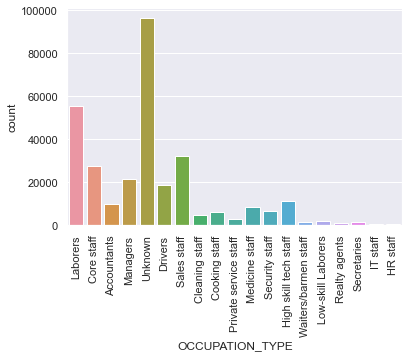

In [17]:
sns.countplot( x ='OCCUPATION_TYPE', data=Application_Data)

plt.xticks(rotation=90)
plt.show()

In [18]:
#We see that there are considerably more applicants with occupation as Labourers

In [19]:
Missing_values_percent.head(20)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
dtype: float64

In [20]:
# Analysing columns EXT_SOURCE_3


In [21]:
Application_Data.EXT_SOURCE_3.sort_values(ascending=False)

29174     0.896010
180278    0.893976
189133    0.893976
91010     0.887664
8596      0.885488
            ...   
307484         NaN
307501         NaN
307504         NaN
307506         NaN
307507         NaN
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

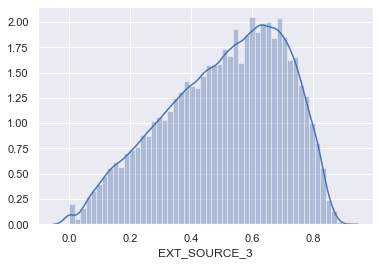

In [22]:
sns.distplot(Application_Data.EXT_SOURCE_3);

#### We notice that that EXT_SOURCE_3 produce a negatively skewed distribution graph.


In [23]:
Application_Data.EXT_SOURCE_3.median()

0.5352762504724826

In [24]:
# Even though mean and median values are close, imputing the EXT_SOURCE_3 col with median 0.5659614260608526 value in place of missing values due to the negative skewed distribution 
Application_Data.EXT_SOURCE_3=Application_Data.EXT_SOURCE_3.fillna(Application_Data.EXT_SOURCE_3.median())

In [25]:
Missing_values_percent.head(20)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
dtype: float64

In [26]:
# Imputing missing values using median.

In [27]:
Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR=Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.median())
Application_Data.AMT_REQ_CREDIT_BUREAU_DAY=Application_Data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_DAY.median())
Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK=Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.median())
Application_Data.AMT_REQ_CREDIT_BUREAU_MON=Application_Data.AMT_REQ_CREDIT_BUREAU_MON.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_MON.median())
Application_Data.AMT_REQ_CREDIT_BUREAU_QRT=Application_Data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_QRT.median())
Application_Data.AMT_REQ_CREDIT_BUREAU_YEAR=Application_Data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(Application_Data.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [28]:
### Dropping unwanted columns: FLAG_DOCUMENT_2 to 22 because we are not given the type of documents associated with FLAG_DOCUMENT_2 to 22.
unwanted=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

Application_Data.drop(labels=unwanted,axis=1,inplace=True)

In [29]:
Application_Data.shape

(307511, 53)

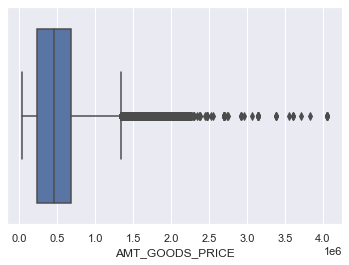

In [30]:
# For Missing values in AMT_GOODS_PRICE. 
sns.boxplot(Application_Data.AMT_GOODS_PRICE)

#### From the box plot we see that there are a lot of outliers, thus imputing the missing values using the median.

In [31]:
Application_Data.AMT_GOODS_PRICE.median()

450000.0

In [32]:
Application_Data.AMT_GOODS_PRICE=Application_Data.AMT_GOODS_PRICE.fillna(Application_Data.AMT_GOODS_PRICE.median())

In [33]:
#Dropping missing values from rows
emptyrow=Application_Data.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.4*len(Application_Data)].index)
Application_Data.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


### For percentage of missing values below 1%, we have not cleaned the columns by imputing values since the existence of these values in small numbers will not affect our analysis.


### Checking for datatypes and formatting

In [34]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [35]:
Application_Data.shape

(307511, 53)

In [36]:
# Converting the columns with <=3 unique values into categorical columns insted of int64 datatype.
for c in Application_Data.columns:
    if Application_Data[c].nunique() <= 3:
        Application_Data[c] = Application_Data[c].astype(object)

In [37]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [38]:
Application_Data.DAYS_BIRTH.head(10)

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
6   -13778
7   -18850
8   -20099
9   -14469
Name: DAYS_BIRTH, dtype: int64

In [39]:
#Removing negative sign
Application_Data['DAYS_BIRTH']=Application_Data['DAYS_BIRTH'].abs()
Application_Data['DAYS_EMPLOYED']=Application_Data['DAYS_EMPLOYED'].abs()
Application_Data['DAYS_REGISTRATION']=Application_Data['DAYS_REGISTRATION'].abs()
Application_Data['DAYS_ID_PUBLISH']=Application_Data['DAYS_ID_PUBLISH'].abs()
Application_Data['DAYS_LAST_PHONE_CHANGE']=Application_Data['DAYS_LAST_PHONE_CHANGE'].abs()

In [40]:
#Further, converting the days into years(assuming 365 days in an year) for the following columns for easier analysis
Application_Data.DAYS_BIRTH=Application_Data.DAYS_BIRTH/365
Application_Data['DAYS_EMPLOYED']=Application_Data['DAYS_EMPLOYED']/365
Application_Data['DAYS_ID_PUBLISH']=Application_Data['DAYS_ID_PUBLISH']/365

In [41]:
Application_Data.DAYS_EMPLOYED.max()

1000.6657534246575

#### We notice a maximum value of 1000.66 years for DAYS_EMPLOYED which is not possible. This maybe a manul error.

## Data is Clean

### Identifying Outliers for numerical columns
#### In a box plot, the values above the upper whisker and below the lower whisker are considered as outliers

In [42]:
Application_Data.AMT_INCOME_TOTAL.sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
246104        26100.0
186643        26100.0
240137        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

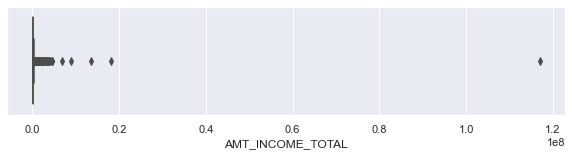

In [43]:
# Plotting to check Outliers in Income of the client

plt.figure(figsize=(10,2))
sns.boxplot(Application_Data.AMT_INCOME_TOTAL)
plt.show()


In [44]:
Q1 = Application_Data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = Application_Data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
LW=(Q1 - 1.5 * IQR)
UW=(Q3 + 1.5 * IQR)
UW

337500.0

#### Although there are a few outliers present above the upper whisker, value 117000000.0 is the farthest from the upper whisker. This maybe due to an applicant earning relatively more money than the rest. Here, all Income above 337500 is considered an outlier.

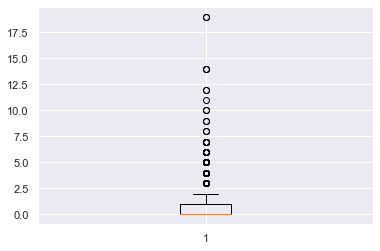

In [45]:
# Plotting to check Outliers in Number of children the client has
plt.boxplot(Application_Data.CNT_CHILDREN)
plt.show()

In [46]:
Q1 = Application_Data['CNT_CHILDREN'].quantile(0.25)
Q3 = Application_Data['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
LW=(Q1 - 1.5 * IQR)
UW=(Q3 + 1.5 * IQR)
UW

2.5

#### Although there are a few outliers present above the upper whisker, value 19 is the farthest from the upper whisker. 19 children clearly is an outlier. Here, all count of children above 3(on rounding 2.5 since 2.5 children is not possible) are considered outliers.

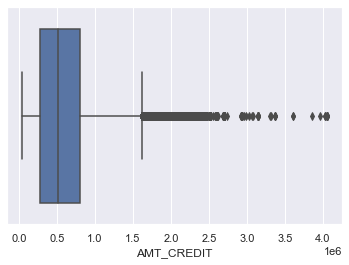

In [47]:
# Plotting to check Outliers in Credit amount of the loan

sns.boxplot(Application_Data.AMT_CREDIT)
plt.show()

In [48]:
Q1 = Application_Data['AMT_CREDIT'].quantile(0.25)
Q3 = Application_Data['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
LW=(Q1 - 1.5 * IQR)
UW=(Q3 + 1.5 * IQR)
UW


1616625.0

#### Although there are a lot outliers present above the upper whisker, value 4050000.0 is the farthest from the upper whisker. Here, credit amount above 1616625.0 are considered outliers.

#### One way to treat the outliers is through creating bins for the entire data except that for the outliers.

## Univariate Analysis

### 1.  Univariate analysis for categorical variables(for Target=1 and Target=0)

#### Need to make bar plots for categorical data for uni analysis, create a function and then use it for creating barplot for each column

In [49]:
# Dividing the data into two sets, i.e., Target-1(Clients with payment difficulties) and Target-0(Clients paying on time)
application_data_1 = Application_Data[Application_Data['TARGET']==1]
application_data_0 = Application_Data[Application_Data['TARGET']==0]

In [50]:
#Categorical Columns
cat_values=list(set(Application_Data.columns)-set(Application_Data.describe().columns))
cat_values

['CODE_GENDER',
 'FLAG_EMAIL',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'NAME_FAMILY_STATUS',
 'FLAG_CONT_MOBILE',
 'TARGET',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_INCOME_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'OCCUPATION_TYPE',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'ORGANIZATION_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_OWN_CAR',
 'FLAG_PHONE']

In [51]:
#Finding mean of the Target column and rounding to three decimal places
Application_Data.TARGET.mean().round(3)

0.081

In [52]:
#Defining function to plot the attributes
def cat_var(cat):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = cat, y = 'TARGET',data=Application_Data)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.000%}', (x + width/2, y + height*1), ha='center')

        
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    
    plt.show()

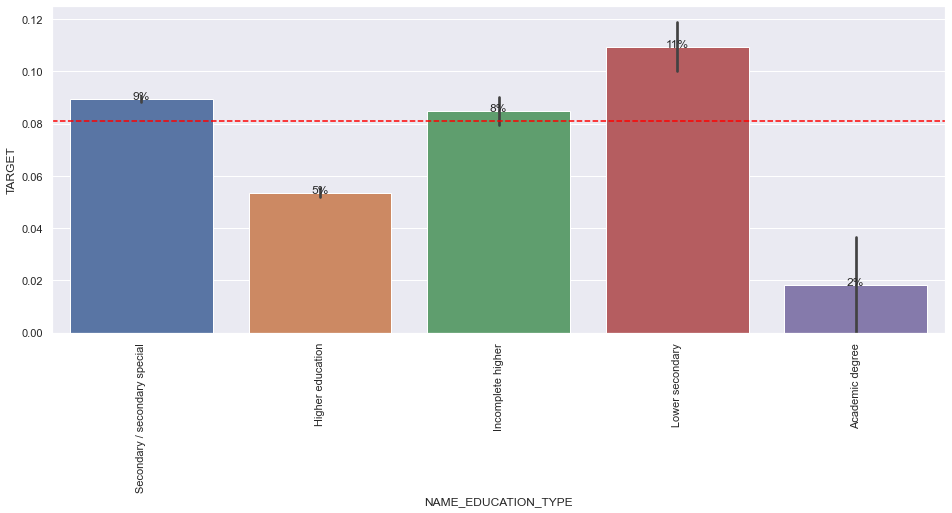

In [53]:
# Analysing col NAME_EDUCATION_TYPE
cat_var(Application_Data.NAME_EDUCATION_TYPE)

#### This indicates that applicants with an academic degree have very low, only 2%, chance of defaulting whereas almost 11% of applicants with lower secondary as education type can be a defaulter.

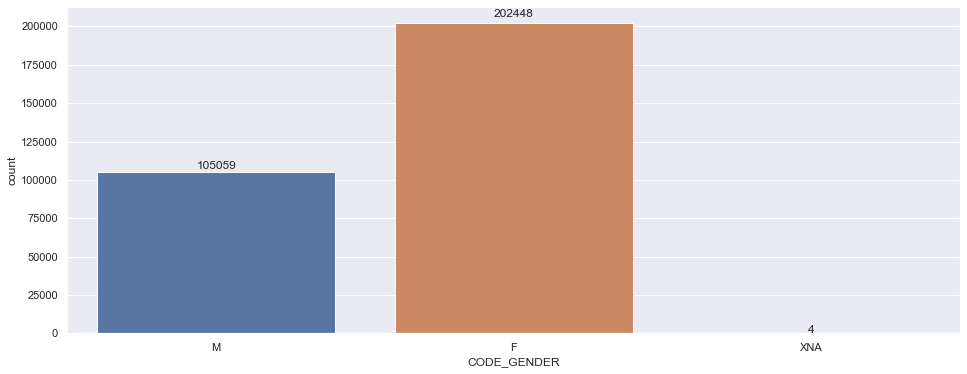

In [54]:
#Checking the count of Genders: M, F and XNA
plt.figure(figsize=(16, 6))
ax= sns.countplot(x=Application_Data.CODE_GENDER, data=Application_Data)
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()


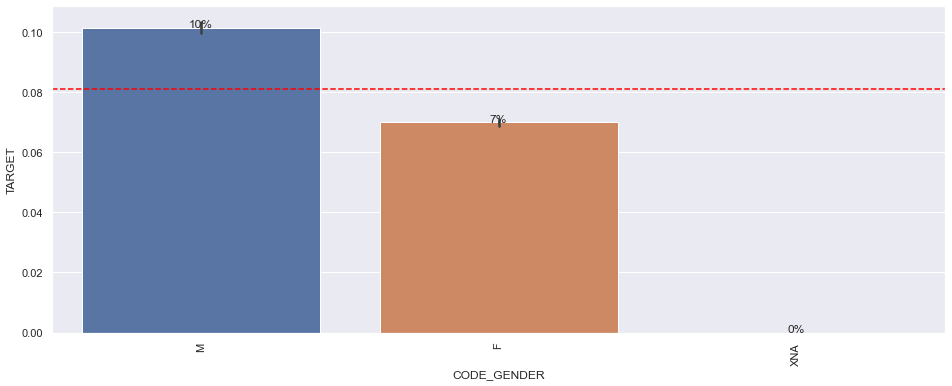

In [55]:
# Analysing col CODE_GENDER 
cat_var(Application_Data.CODE_GENDER)

#### Although there are more male applicants than female applicants, there are more male(10%) defaulters than females(7%)
.

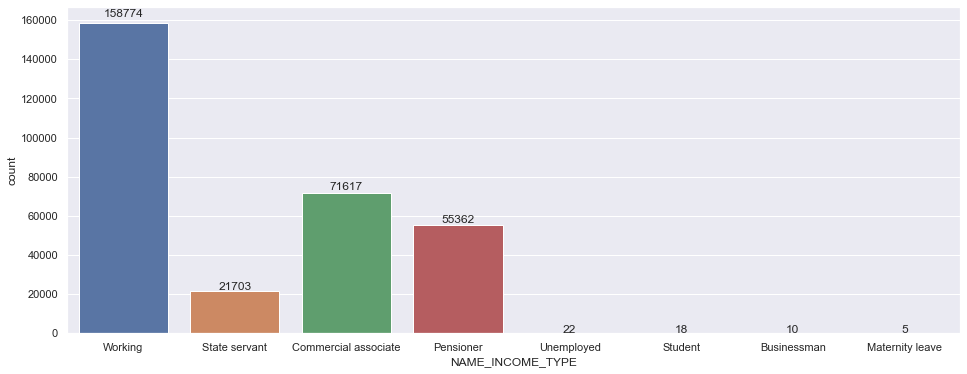

In [56]:
plt.figure(figsize=(16, 6))
ax= sns.countplot(x=Application_Data.NAME_INCOME_TYPE, data=Application_Data)
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

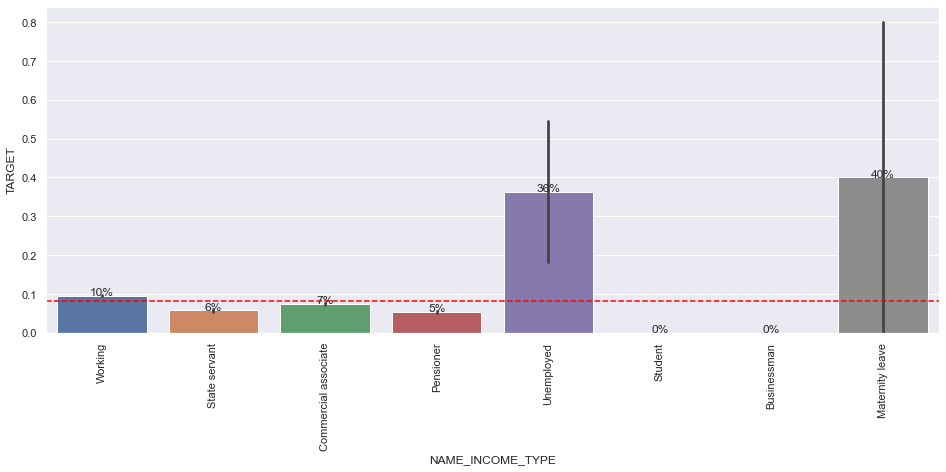

In [57]:
# Analysing col NAME_INCOME_TYPE
cat_var(Application_Data.NAME_INCOME_TYPE)

#### We can see that no student or businessmen as defaulters whereas applicants with income type 'Maternity leave' and 'Unemployed' have the highest default rate.

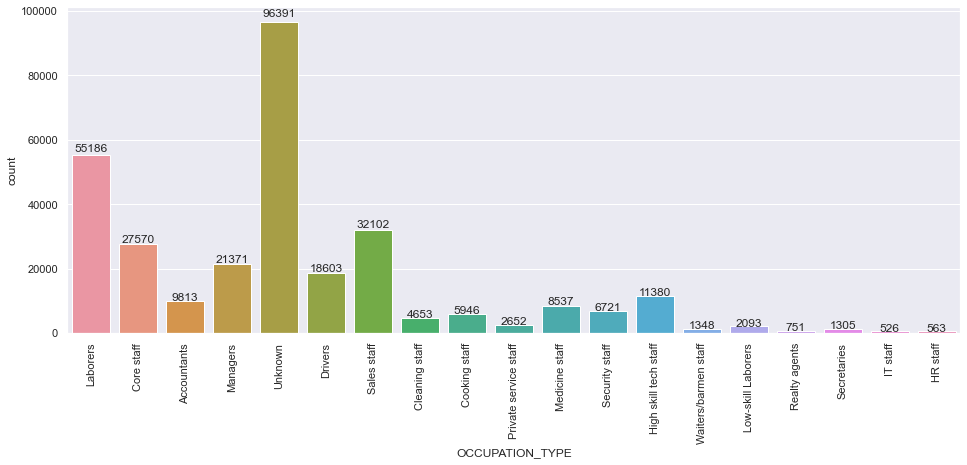

In [58]:
plt.figure(figsize=(16, 6))
ax= sns.countplot(x=Application_Data.OCCUPATION_TYPE, data=Application_Data)
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
        plt.xticks(rotation=90)
plt.show()

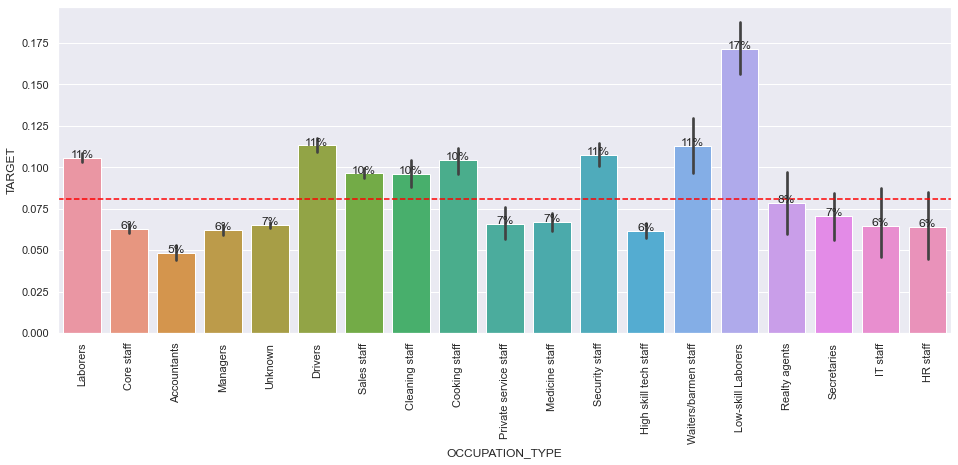

In [59]:
# Analysing col OCCUPATION_TYPE
cat_var(Application_Data.OCCUPATION_TYPE)

#### Low_skill Laborers have rate of default way above the average at 17% whereas Occupation_type Accountants have lowest percenage at 5%. It is also important to note that majority of the values are unknown (at count 96391).

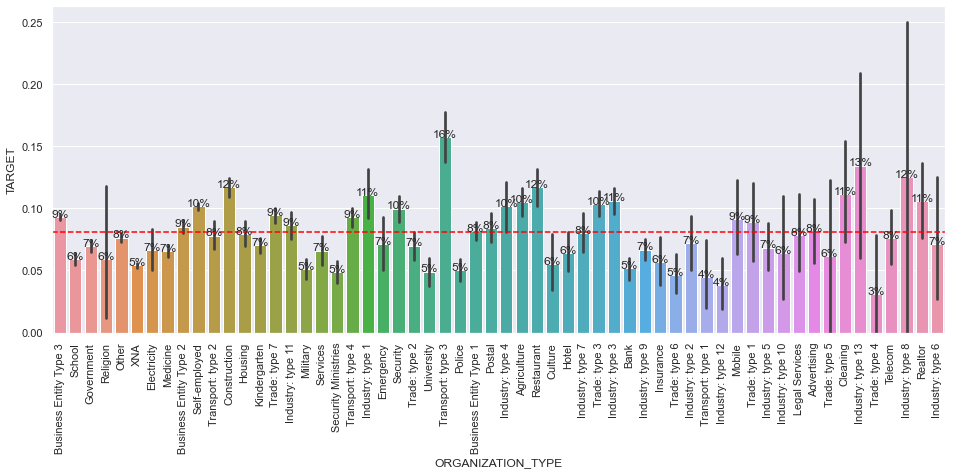

In [60]:
cat_var(Application_Data.ORGANIZATION_TYPE)

#### Transport:Type 3 has the highest followed by Industry:type 13. It is also worth noting that Military, Security Ministries, Bank, Government, University and Schools have values much lower than the mean value indicating that the number of applicants defaulting from these organisations are very low.

In [61]:
Application_Data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

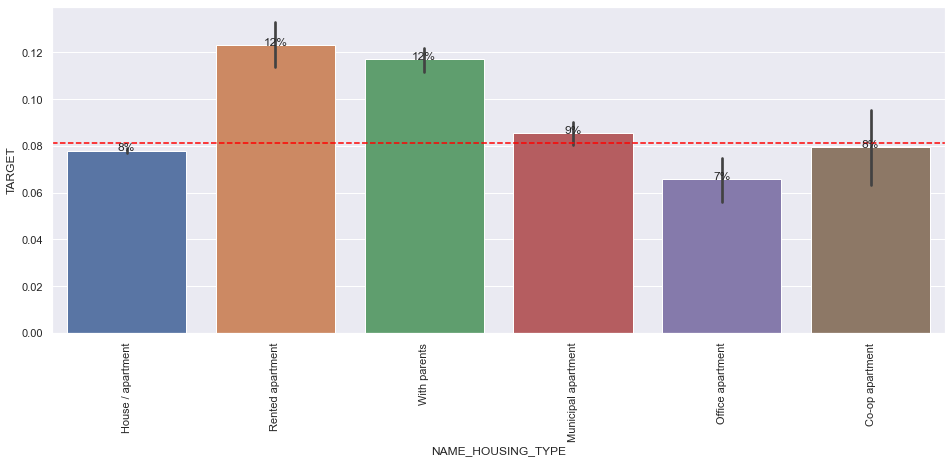

In [62]:
# Analysing Col NAME_HOUSING_TYPE
cat_var(Application_Data.NAME_HOUSING_TYPE)

#### Applicants staying in rented apartments or staying with their parents have a much higher rate of default.

In [63]:
Application_Data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

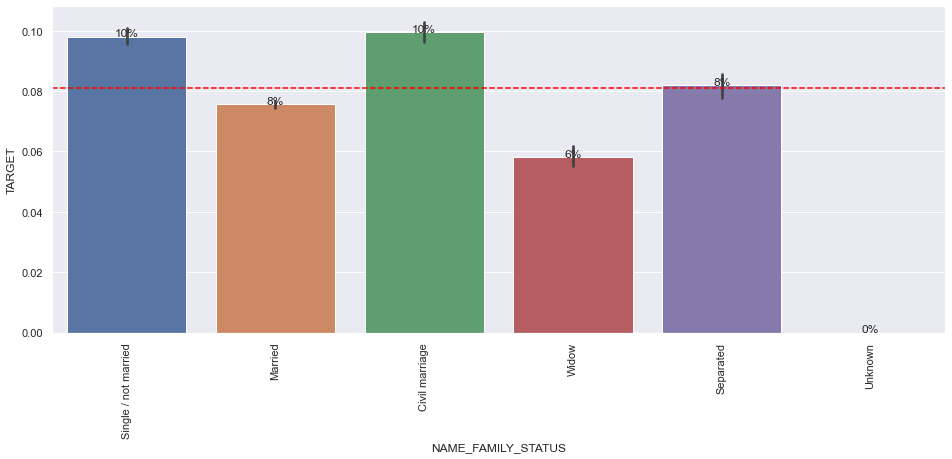

In [64]:
# Analysing Col NAME_FAMILY_STATUS
cat_var(Application_Data.NAME_FAMILY_STATUS)

#### It can be seen that single/unmarried applicants or applicants with civil marriange have a relatively higher default rate with the lowest being that of widows.

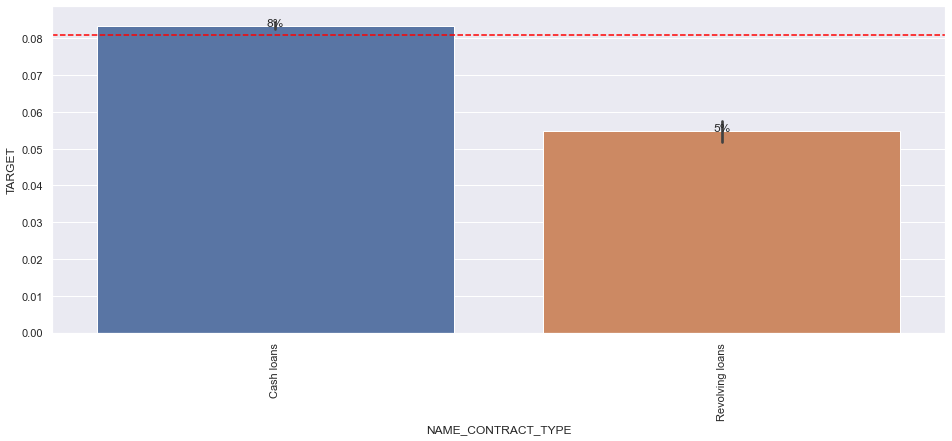

In [65]:
# Analysing col NAME_CONTRACT_TYPE
cat_var(Application_Data.NAME_CONTRACT_TYPE)

#### It can be seen that applicatants provided with revolving loans have rate of default much lower than the average rate
#### The ones  applying for cash loans have default rate asme as average default rate

#### On Analysing  FLAG_CONT_MOBILE: Default rate is the same for applicants who provide mobile contact(8% for both) and those who dont. This is almost equal to the average default rate.

## Segmented Univariate Analysis
### Looking at the continuous variables using bins

In [66]:
num_values = Application_Data.describe().columns
num_values

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

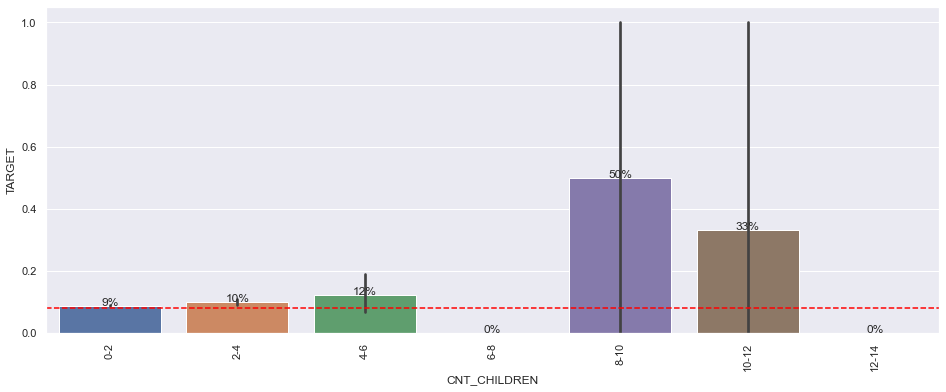

In [67]:
bins = [0, 2, 4, 6,8,10, 12, 14]
rnge = ['0-2', '2-4', '4-6', '6-8', '8-10','10-12','12-14']
Application_Data.CNT_CHILDREN_RANGE = pd.cut(Application_Data.CNT_CHILDREN, bins, labels=rnge)

cat_var(Application_Data.CNT_CHILDREN_RANGE)

#### We can see that there is a considerable default rate of 50% for applicants with number of children either 8,9 or 10 followed by 30% rate for range 10-12. This implies that we need to pay attention to the count of children per applicant especially when it is in the range of 8-12. 

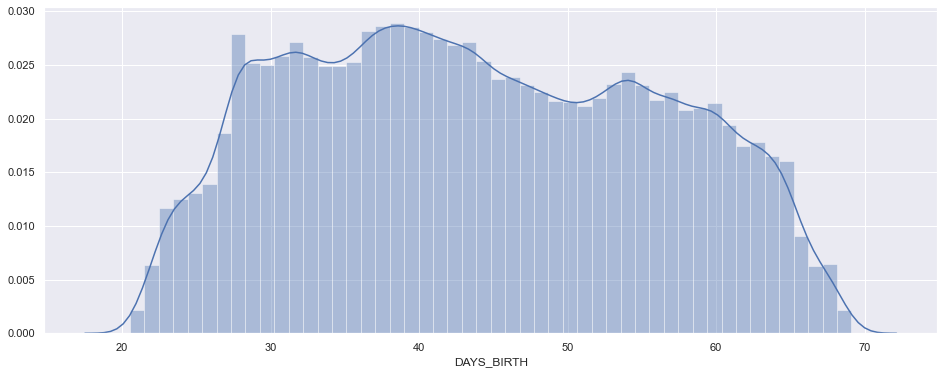

In [68]:
plt.figure(figsize=(16, 6))
sns.distplot(Application_Data.DAYS_BIRTH)
plt.show()

In [69]:
bins = [0, 20, 30, 40, 50, 60, 70]
rnge = ['0-20', '20-30', '30-40', '40-50', '50-60','60-70']
Application_Data.DAYS_BIRTH_RANGE = pd.cut(Application_Data.DAYS_BIRTH, bins, labels=rnge)

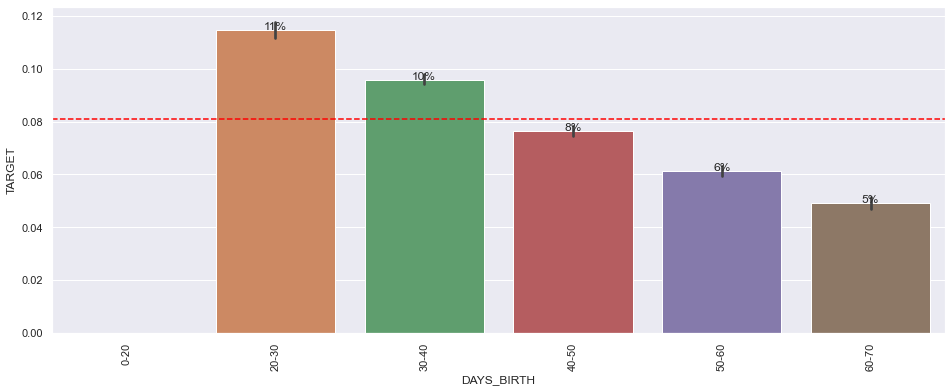

In [70]:
cat_var(Application_Data.DAYS_BIRTH_RANGE)

#### We can see a decresing rate of default with increasing age. Only 5% of the applicant in the range 60-70 are defaulters.

In [71]:
num_values

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [72]:
bins = [0, 1000000, 2000000 , 3000000, 4000000]
rnge = ['0-10L', '10L-20L', '20L-30L', '30L-40L']
Application_Data.AMT_CREDIT_RANGE=pd.cut(Application_Data.AMT_CREDIT, bins, labels=rnge)

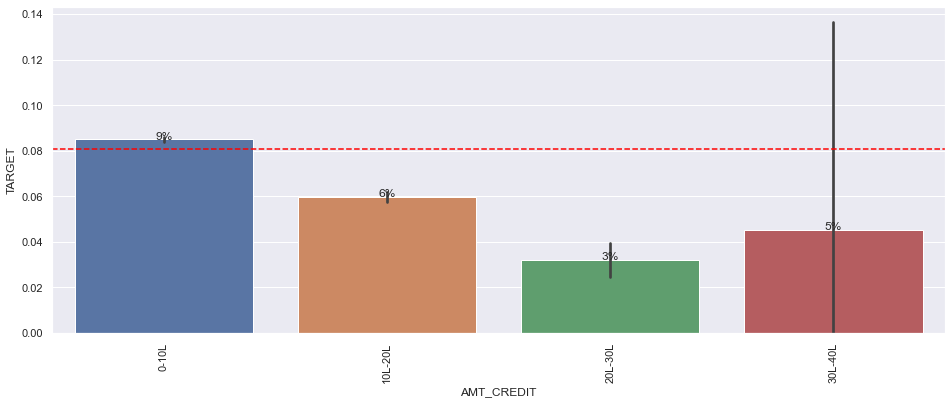

In [73]:
cat_var(Application_Data.AMT_CREDIT_RANGE)

#### We notice that for a credit amount between 20 lakhs to 30 lakhs, the default rate is very low at 3%.

In [74]:
bins = [0, 100000, 2000000 , 3000000, 4000000, 5000000]
rnge = ['0-5L', '10L-20L', '20L-30L', '30L-40L','Above 40L' ]
Application_Data.AMT_GOODS_PRICE_RANGE=pd.cut(Application_Data.AMT_GOODS_PRICE, bins, labels=rnge)

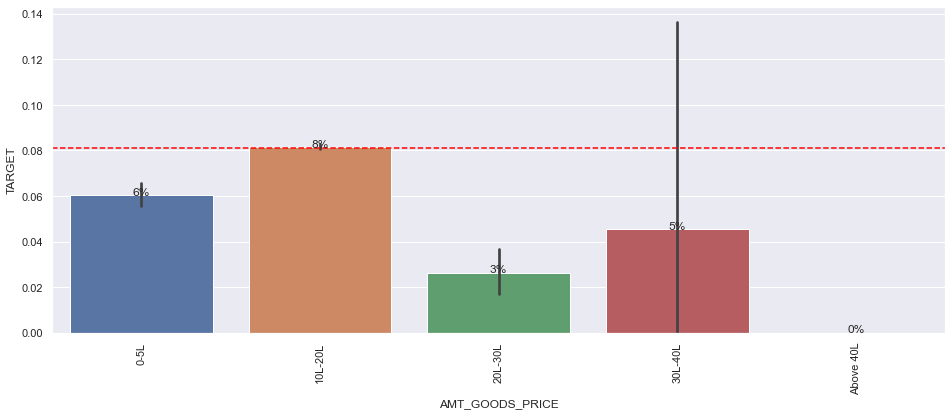

In [75]:
cat_var(Application_Data.AMT_GOODS_PRICE_RANGE)

#### Clearly applicants with goods in the price range of 20Lakhs and 30Lakhs have a low default rate of 3%

### The following variables are strong indicators of default according to univariate analysis:
1. CODE_GENDER
2. OCCUPATION_TYPE
3. NAME_INCOME_TYPE
4. DAYS_BIRTH
5. AMT_CREDIT
6. CNT_CHILDREN
7. NAME_HOUSING_TYPE


## Data Imbalance

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


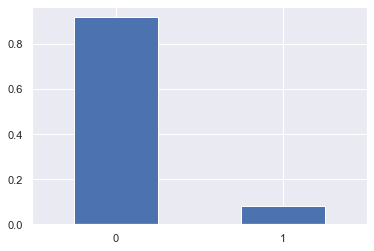

In [76]:
print(100*Application_Data.TARGET.value_counts()/ len(Application_Data))
(Application_Data.TARGET.value_counts()/ len(Application_Data)).plot.bar()
plt.xticks(rotation=0)
plt.show()
Imbalance_ratio=(Application_Data['TARGET']==0).sum() / (Application_Data['TARGET']==1).sum()

#We see that there are 91.927118% of "non-defaulter" and 8.072882% of "defaulter" within the customers.

#### This indicates that for every 1 there are almost 11 number of 0's. This is a higlhy imbalanced data with imbalance ratio : 11.39

In [77]:
target0_corr=application_data_0.iloc[0:,2:]
target1_corr=application_data_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


In [78]:
def corr_targets(data,title):
    plt.figure(figsize=(23,17))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
# Creating a heatmap for the correlation
    sns.heatmap(data, cmap="coolwarm",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

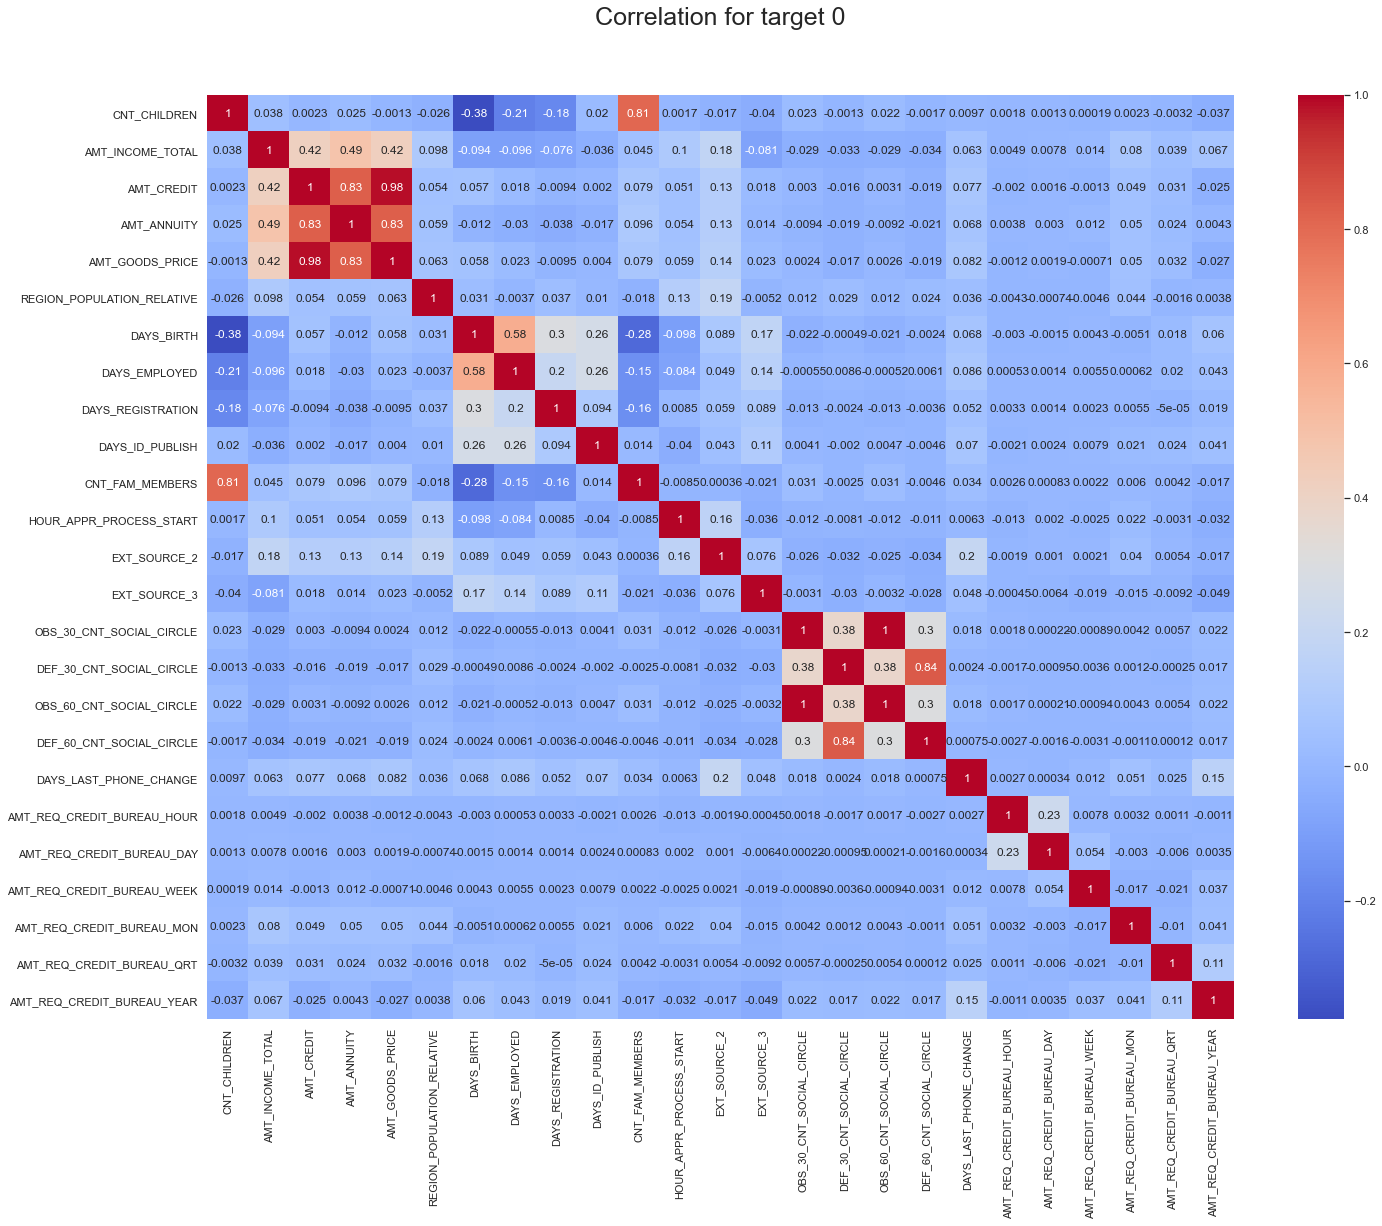

In [79]:
corr_targets(data=target0,title='Correlation for target 0')

### Top 10 Correlations

In [80]:


l1=target0.unstack()
l1.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.997362
AMT_GOODS_PRICE             AMT_CREDIT                    0.984995
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.843584
AMT_CREDIT                  AMT_ANNUITY                   0.831900
AMT_ANNUITY                 AMT_GOODS_PRICE               0.829818
CNT_CHILDREN                CNT_FAM_MEMBERS               0.810519
DAYS_EMPLOYED               DAYS_BIRTH                    0.583711
AMT_ANNUITY                 AMT_INCOME_TOTAL              0.485699
AMT_INCOME_TOTAL            AMT_GOODS_PRICE               0.419720
AMT_CREDIT                  AMT_INCOME_TOTAL              0.416017
dtype: float64

### Top 10 Corr for Target 0

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.997362

AMT_GOODS_PRICE             AMT_CREDIT                    0.984995

DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.843584

AMT_CREDIT                  AMT_ANNUITY                   0.831900

AMT_ANNUITY                 AMT_GOODS_PRICE               0.829818

CNT_CHILDREN                CNT_FAM_MEMBERS               0.810519

DAYS_EMPLOYED               DAYS_BIRTH                    0.583711

AMT_ANNUITY                 AMT_INCOME_TOTAL              0.485699

AMT_INCOME_TOTAL            AMT_GOODS_PRICE               0.419720

AMT_CREDIT                  AMT_INCOME_TOTAL              0.416017

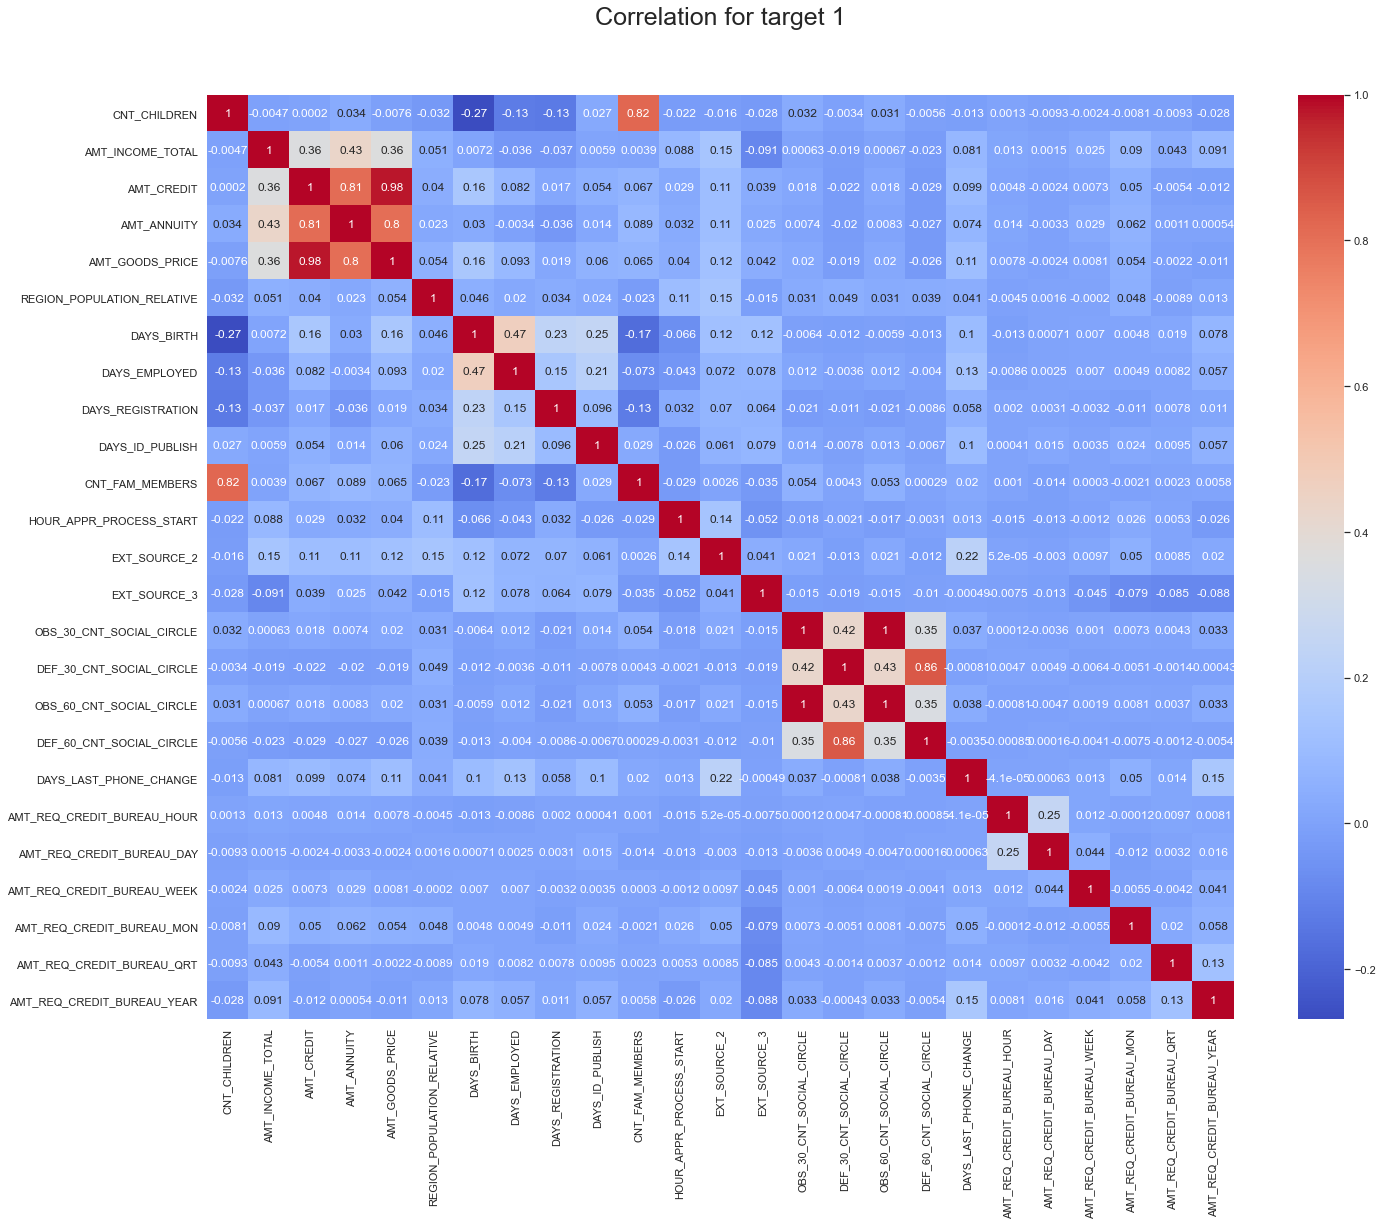

In [81]:
corr_targets(data=target1,title='Correlation for target 1')

In [82]:
l2=target1.unstack()
l2.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.997061
AMT_GOODS_PRICE             AMT_CREDIT                    0.976430
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.857446
CNT_FAM_MEMBERS             CNT_CHILDREN                  0.823307
AMT_ANNUITY                 AMT_CREDIT                    0.811443
AMT_GOODS_PRICE             AMT_ANNUITY                   0.804099
DAYS_EMPLOYED               DAYS_BIRTH                    0.466526
AMT_ANNUITY                 AMT_INCOME_TOTAL              0.431617
OBS_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.425990
OBS_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.423016
dtype: float64

#### Top 10 Correlations

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.997061

AMT_GOODS_PRICE             AMT_CREDIT                    0.976430

DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.857446

CNT_FAM_MEMBERS             CNT_CHILDREN                  0.823307

AMT_ANNUITY                 AMT_CREDIT                    0.811443

AMT_GOODS_PRICE             AMT_ANNUITY                   0.804099

DAYS_BIRTH                  DAYS_EMPLOYED                 0.466526

AMT_INCOME_TOTAL            AMT_ANNUITY                   0.431617

OBS_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      0.425990

DEF_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.423016


## Bi Variate Analysis

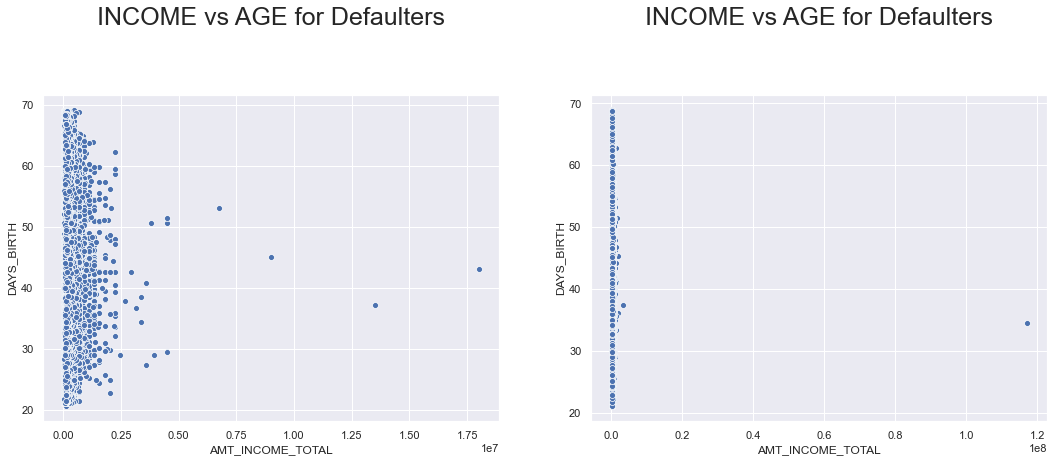

In [83]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_INCOME_TOTAL',y='DAYS_BIRTH',data=application_data_0)
plt.title('INCOME vs AGE for Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_INCOME_TOTAL',y='DAYS_BIRTH',data=application_data_1)
plt.title('INCOME vs AGE for Defaulters')
plt.show()

#### There are no linear relation between DAYS_BIRTH and AMT_INCOME_TOTAL. 

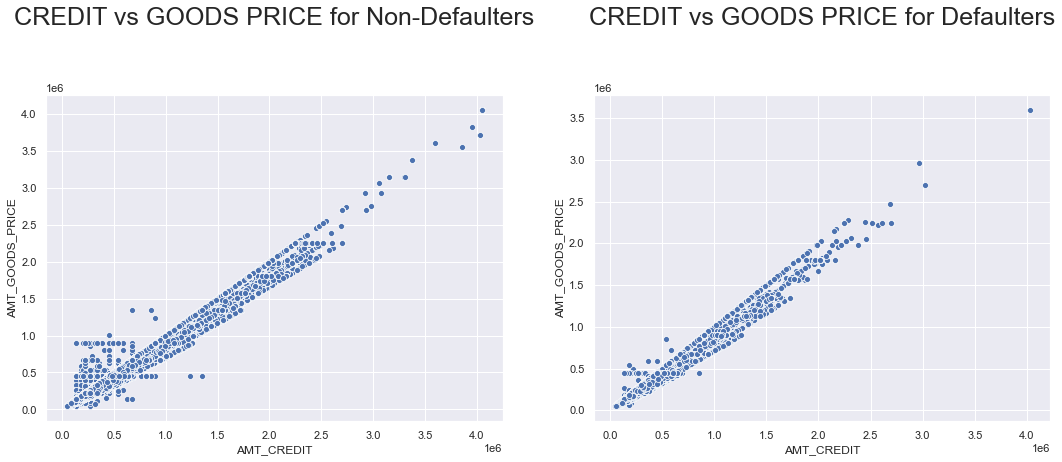

In [84]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=application_data_0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=application_data_1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

#### We see a linear increase in both graphs

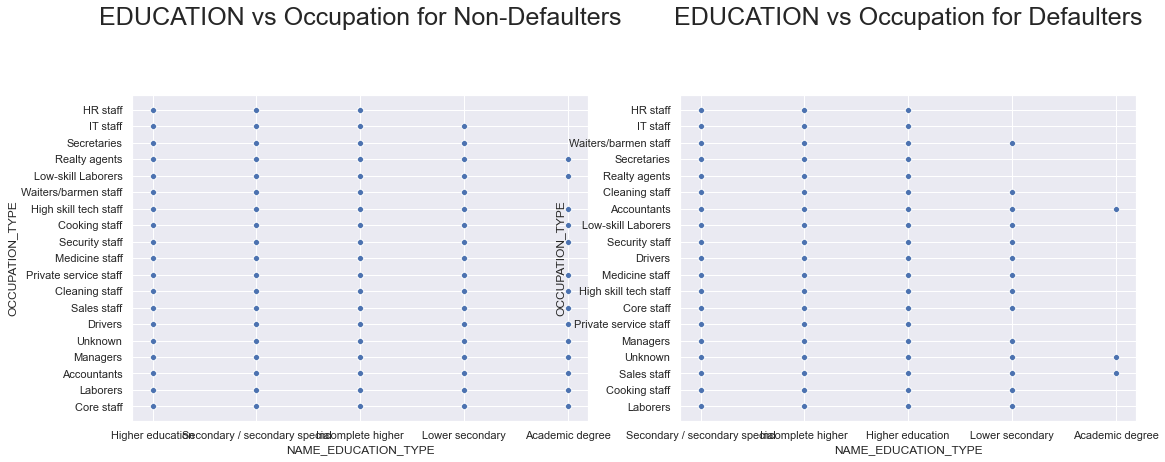

In [85]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='NAME_EDUCATION_TYPE',y='OCCUPATION_TYPE',data=application_data_0)
plt.title('EDUCATION vs Occupation for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='NAME_EDUCATION_TYPE',y='OCCUPATION_TYPE',data=application_data_1)
plt.title('EDUCATION vs Occupation for Defaulters')
plt.show()

#### There is no Linear relation between Education and occupation 

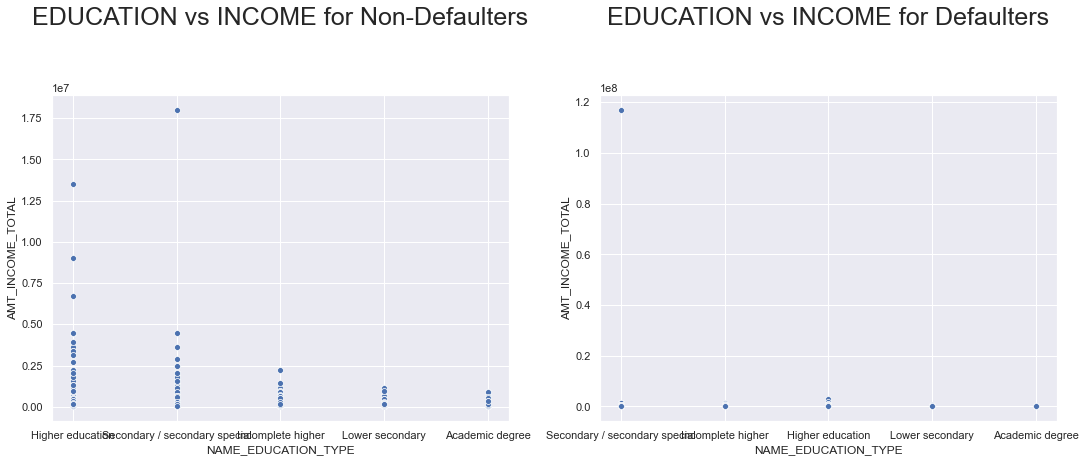

In [86]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=application_data_0)
plt.title('EDUCATION vs INCOME for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=application_data_1)
plt.title('EDUCATION vs INCOME for Defaulters')
plt.show()

In [87]:
def bi_var(base, vari, legend_pos_x, legend_pos_y):
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = base, y = 'TARGET',hue=vari,data=Application_Data, ci = None)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.legend(loc='center left', bbox_to_anchor=(legend_pos_x, legend_pos_y), ncol=1).set_title(vari)
    plot_title = f"Default Rate against {base} and {vari}"
    ax.set_title(plot_title, fontsize=20)
    
    
    plt.show()

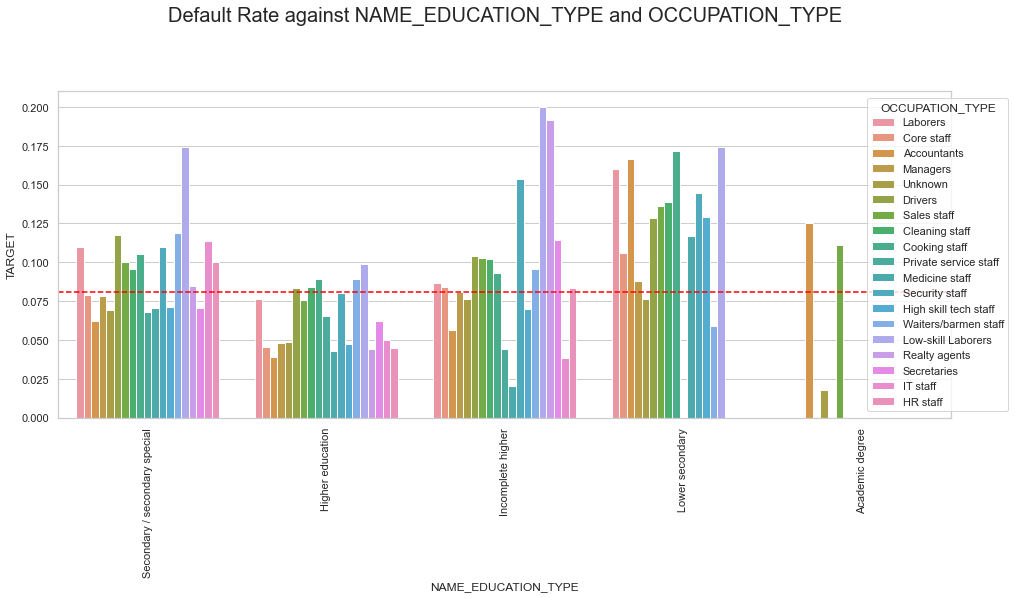

In [88]:
bi_var('NAME_EDUCATION_TYPE','OCCUPATION_TYPE', 0.90, 0.50 )

1. Defaluts are more for Low skill laborers with Secondary / Secondary Special followed by Higher Education and Lower Education



## MERGING DATASETS

### Cleaning Previous Dataset

In [91]:
Previous_Data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
Previous_Data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [93]:
Previous_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
Previous_Data.NAME_CLIENT_TYPE


0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [95]:
# Converting DAYS_DECISION column from negatve to positive values
Previous_Data.DAYS_DECISION=Previous_Data.DAYS_DECISION.abs()

In [96]:
Previous_Data.DAYS_DECISION.value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [97]:
Previous_Data.AMT_CREDIT.sort_values(ascending=False).head(20)

779304     6905160.0
1163698    4509688.5
24612      4104351.0
208075     4104351.0
1563784    4104351.0
296781     4104351.0
1058067    4095000.0
739610     4085550.0
1243948    4050000.0
534174     4050000.0
1162361    4050000.0
1402218    4050000.0
1243949    4050000.0
1254926    4050000.0
1458863    4050000.0
1307946    4050000.0
396469     4050000.0
691888     4050000.0
674341     4050000.0
774894     4050000.0
Name: AMT_CREDIT, dtype: float64

In [98]:
Previous_Data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

#### 346 XNA values exist in this column


In [99]:
Previous_Data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [100]:
Previous_Data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

#### This column has XAP 922661 and XNA 677918 values

In [101]:
Previous_Data.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

#### This column has XAP `1353093` and XNA `5244` values


#### Checking for Missing values in the dataset

In [102]:
Previous_Data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [103]:
# Missing Values
Missing_values_previous=(100*Previous_Data.isna().sum()/len(Previous_Data)).round(2).sort_values(ascending=False)

In [104]:
Missing_values_previous

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [105]:
# Dropping columns with percentage of missing values>=35%

Previous_Data=Previous_Data[Previous_Data.columns[Previous_Data.isna().mean()<0.35]]
Previous_Data.shape



(1670214, 26)

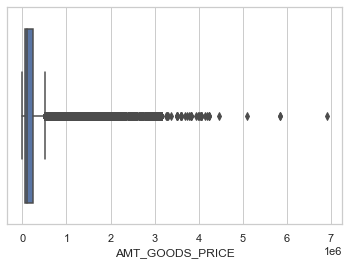

In [106]:
#Checking the Outliers
sns.boxplot(Previous_Data.AMT_GOODS_PRICE)

### Dealing with XNA and XAP values

In [107]:
# Dropping XNA and XAP values in NAME_CASH_LOAN_PURPOSE column
Previous_Data=Previous_Data.drop(Previous_Data[Previous_Data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Previous_Data=Previous_Data.drop(Previous_Data[Previous_Data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [108]:
Previous_Data.shape

(69635, 26)

In [109]:
Previous_Data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Refused         58.674517
Approved        38.677389
Canceled         2.353701
Unused offer     0.294392
Name: NAME_CONTRACT_STATUS, dtype: float64

In [110]:
#Merging Both Application data & Previous Data using Inner Join
merged= pd.merge(Application_Data,Previous_Data, how='inner', on=['SK_ID_CURR'])

In [111]:
merged.shape

(59413, 78)

In [112]:
merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

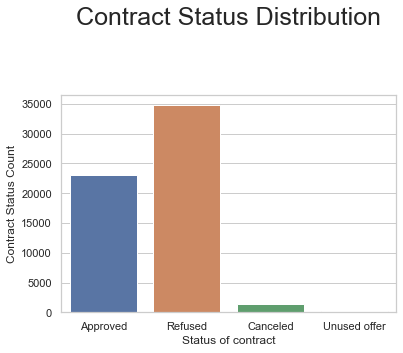

In [113]:
# Plotting NAME_CONTRACT_STATUS
sns.countplot(merged.NAME_CONTRACT_STATUS)
plt.title("Contract Status Distribution")
plt.xlabel("Status of contract")
plt.ylabel("Contract Status Count")
plt.show()

Refused         64.452772
Approved        33.389327
Canceled         1.886549
Unused offer     0.271353
Name: NAME_CONTRACT_STATUS, dtype: float64


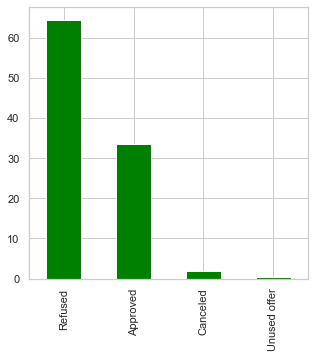

In [114]:

plt.figure(figsize=(5,5))
(merged.loc[merged.TARGET==1].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar(color='Green')
print(merged.loc[merged.TARGET==1].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)

In [115]:
# Renaming the Values to approved, refused, canceled, unused
approved=merged[merged.NAME_CONTRACT_STATUS=='Approved']
refused=merged[merged.NAME_CONTRACT_STATUS=='Refused']
canceled=merged[merged.NAME_CONTRACT_STATUS=='Canceled']
unused=merged[merged.NAME_CONTRACT_STATUS=='Unused Offer']

0    88.801733
1    11.198267
Name: TARGET, dtype: float64


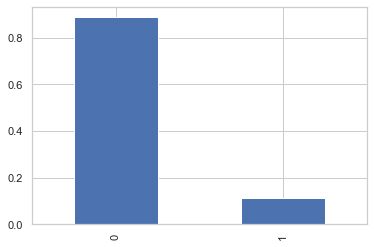

In [116]:
approved.TARGET.value_counts(normalize=True).plot.bar()
print(approved.TARGET.value_counts(normalize=True)*100)

#### This shows that `11%` of applicants with issues in payment had their loans accepted.

0    85.660898
1    14.339102
Name: TARGET, dtype: float64


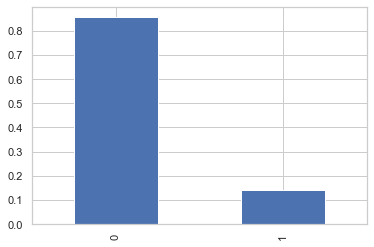

In [117]:
refused.TARGET.value_counts(normalize=True).plot.bar()
print(refused.TARGET.value_counts(normalize=True)*100)

#### This shows that `14%` of applicants with issues in payment had their loans refused.


In [118]:
def plot_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused Loans", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    ax2.set_title("Approved Loans", fontsize=10)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Cancelled Loans", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

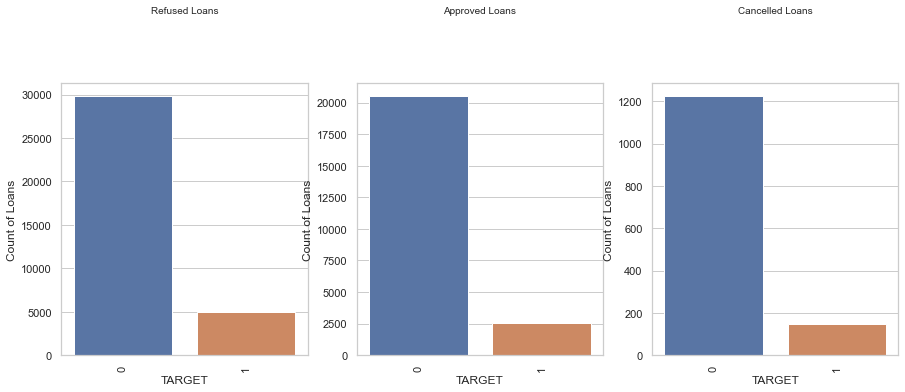

In [119]:
plot_func('TARGET')

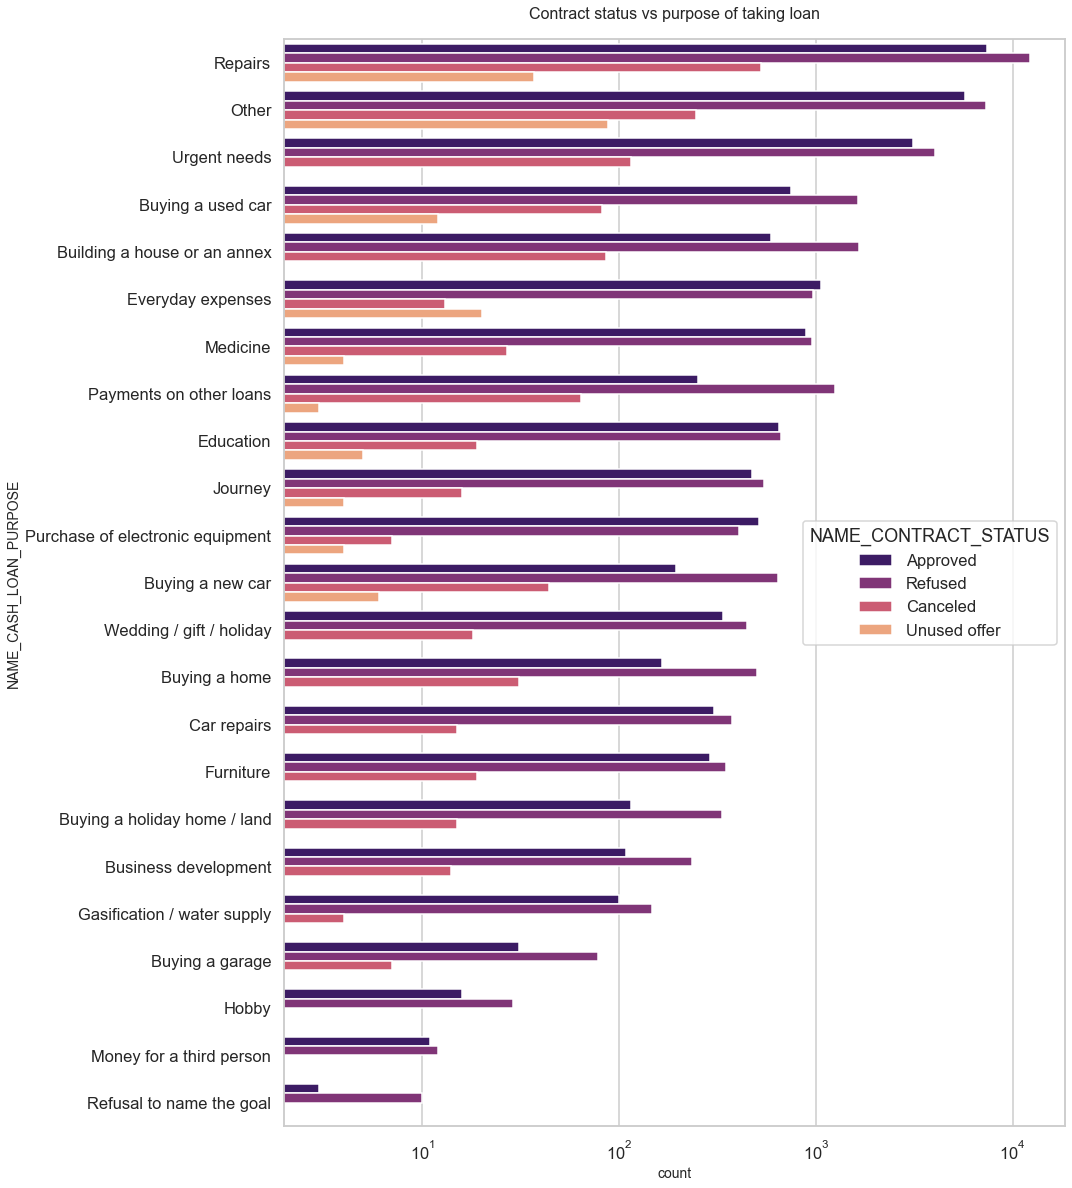

In [120]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(14,20))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titlepad'] = 20
plt.xscale('log')
plt.title('Contract status vs purpose of taking loan')
ax = sns.countplot(data=merged, y='NAME_CASH_LOAN_PURPOSE', order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue ='NAME_CONTRACT_STATUS',palette='magma')

Most rejection of loans came from purpose 'repairs'.

For education purposes we have equal number of approves and rejection

Payign other loans and buying a new car is having significant higher rejection than approves.

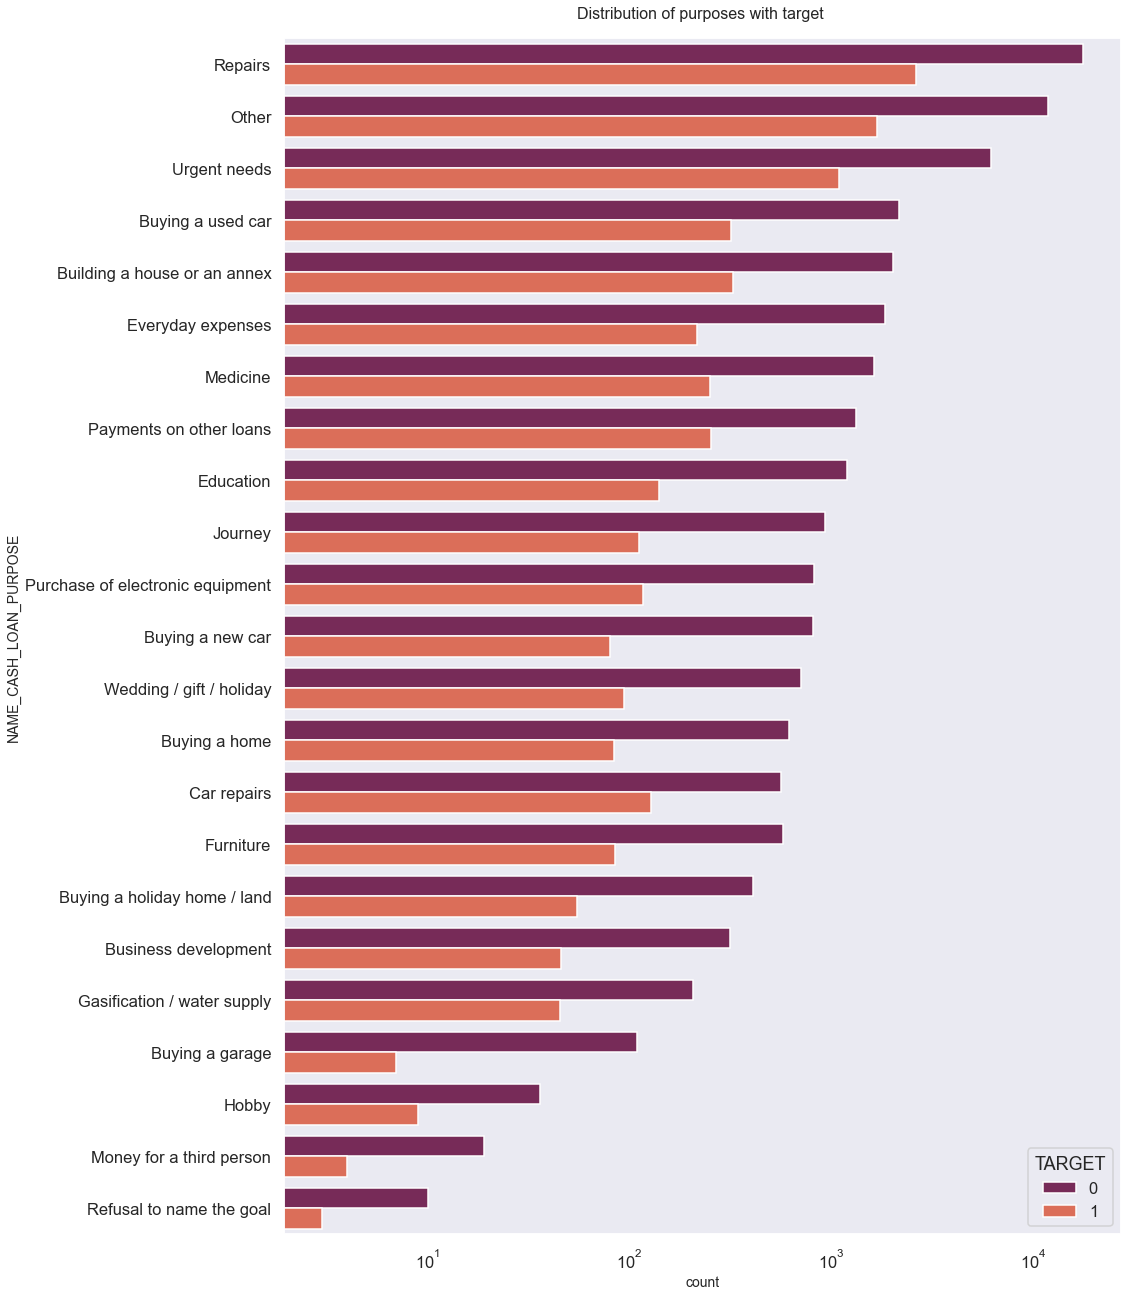

In [121]:
sns.set_style('dark')
sns.set_context('talk')

plt.figure(figsize=(15,22))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titlepad'] = 20
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rocket')

Loan purposes with 'Repairs' are facing more difficulites in payment on time.

There are few places where loan payment is significant higher than facing difficulties. 

They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

Status of Non-Defaulters 
 Repeater     0.804950
New          0.145334
Refreshed    0.048999
XNA          0.000716
Name: NAME_CLIENT_TYPE, dtype: float64


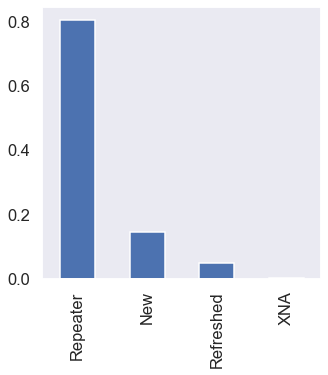

Status of Defaulters 
 Repeater     0.817547
New          0.141233
Refreshed    0.040832
XNA          0.000388
Name: NAME_CLIENT_TYPE, dtype: float64


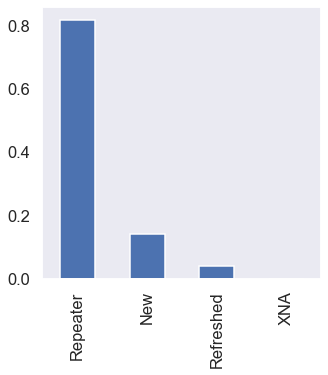

In [122]:
plt.figure(figsize=(5,5))
print('Status of Non-Defaulters \n' , merged.loc[merged.TARGET==0].NAME_CLIENT_TYPE.value_counts(normalize=True))
merged.loc[merged.TARGET==0].NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize=(5,5))
print('Status of Defaulters \n' , merged.loc[merged.TARGET==1].NAME_CLIENT_TYPE.value_counts(normalize=True))
merged.loc[merged.TARGET==1].NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

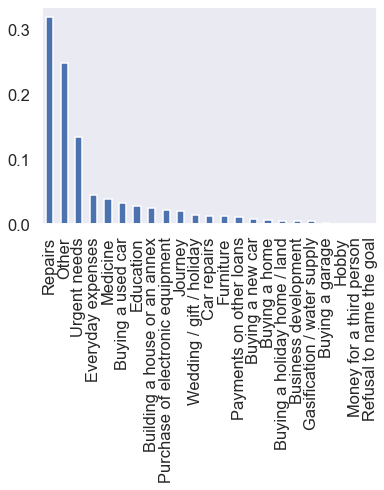

In [123]:
approved.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar();

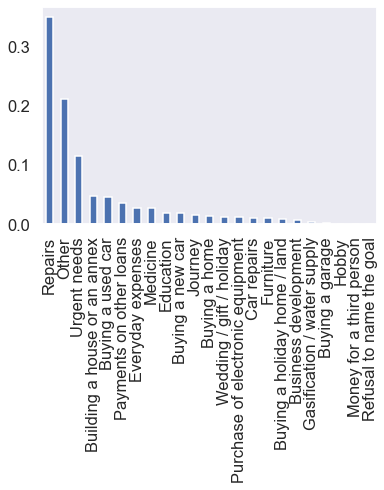

In [124]:
refused.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar();

#### From both the plots we notice that most applicants take loans for Repairs and there is not a big difference in the amount of percentage of approved and refused loans in both cases.

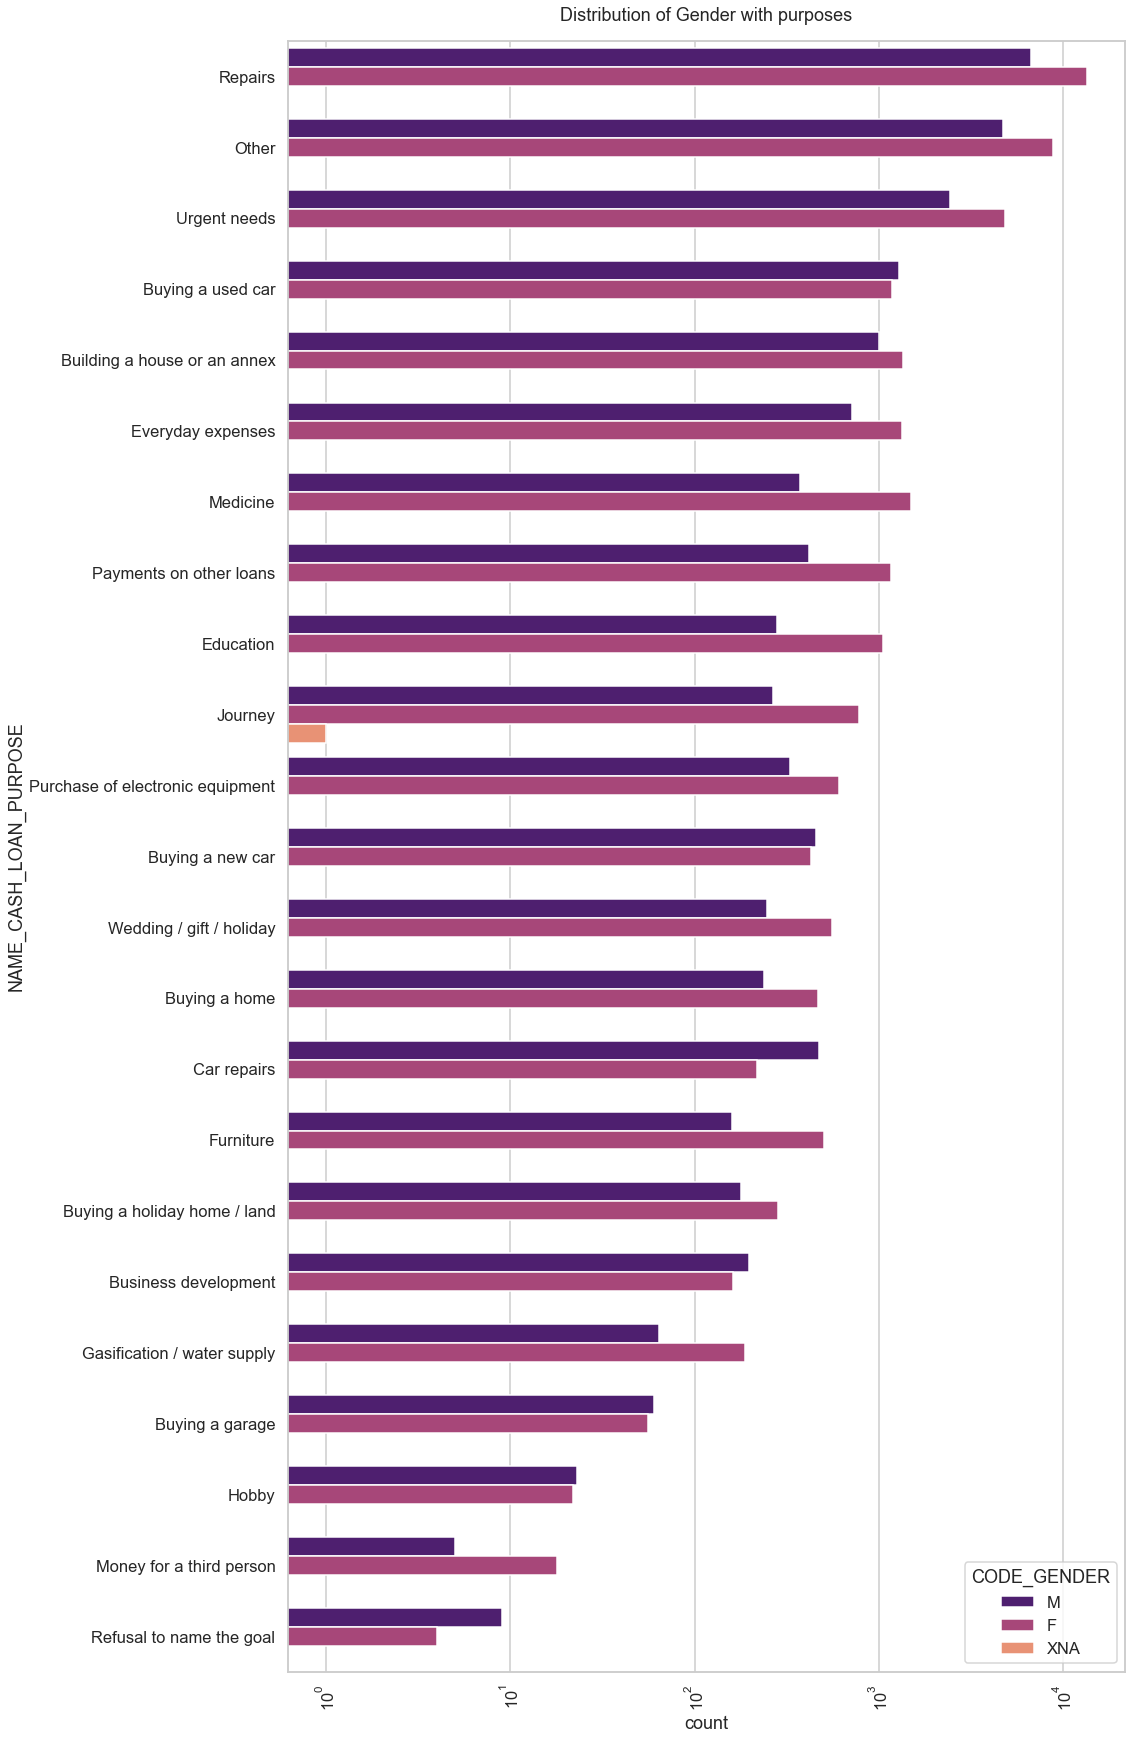

In [126]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Gender with purposes')
ax = sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')


#### Females with repairs facing more difficulty in paying loan on time
####  Males facing more difficulty to buying a car